# Based on the following code from Paul Hiemstra
#### https://github.com/PaulHiemstra/qlearning_paper

# Helper Functions

In [17]:
import configparser

config = configparser.RawConfigParser() 
config.read_file(open(r'q_learning.config'))

alpha = config.get('train.qlearning', 'alpha')
gamma = config.get('train.qlearning', 'gamma')
epsilon = config.get('train.qlearning', 'epsilon')
z = config.get('train.qlearning', 'z')
tree_search_file_name = config.get('tree_search', 'file_name')
trained_player = config.get('train.qlearning', 'file_name')
board_size = config.get('board_size', 'n')

# Loading the tree search variant

In [13]:
from support_functions import precompute_tree_moves
import dill

with open(tree_search_file_name, 'rb') as f:
    tree = dill.load(f)
precompute_tree_moves(tree)

100%|██████████| 623529/623529 [00:14<00:00, 42947.93it/s] 


# Create a player, play against the tree search

In [18]:
from support_functions import Tictoe, Player
import numpy as np
from tqdm import tqdm
import pandas as pd

tictactoe = Tictoe(int(board_size))

untrained_player = Player(1, tree)  

no_episodes = int(z)
rewards = pd.Series(np.zeros(no_episodes))
for ep_idx in tqdm(range(no_episodes)):
    while not tictactoe.is_endstate():
        tictactoe = untrained_player.make_move(tictactoe)
        tictactoe = untrained_player.make_computer_move(tictactoe)
        
    rewards[ep_idx] = tictactoe.get_reward(1)
    tictactoe.reset_board()

100%|██████████| 1000/1000 [00:00<00:00, 2916.39it/s]


## Note that the untrained player loses more than they tie 

In [19]:
print(rewards.value_counts())

-10.0    785
 5.0     215
dtype: int64


# Use a player that has been trained 

In [20]:
import dill

with open(trained_player, 'rb') as f:
    trained_player = dill.load(f)
trained_player.set_params(epsilon=float(epsilon))

no_episodes = int(z)
rewards = pd.Series(np.zeros(no_episodes))
for ep_idx in tqdm(range(no_episodes)):
    while not tictactoe.is_endstate():
        tictactoe = trained_player.make_move(tictactoe)
        tictactoe = trained_player.make_computer_move(tictactoe)
        
    rewards[ep_idx] = tictactoe.get_reward(1)
    tictactoe.reset_board()

100%|██████████| 1000/1000 [00:00<00:00, 2853.17it/s]


## Note here that the Q-Learning variant ties 100% of the time

In [21]:
print(rewards.value_counts())

 5.0     784
-10.0    216
dtype: int64


# Seeing the Q-Table

/opt/homebrew/lib/python3.10/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_text : Removed 1086 rows containing missing values.


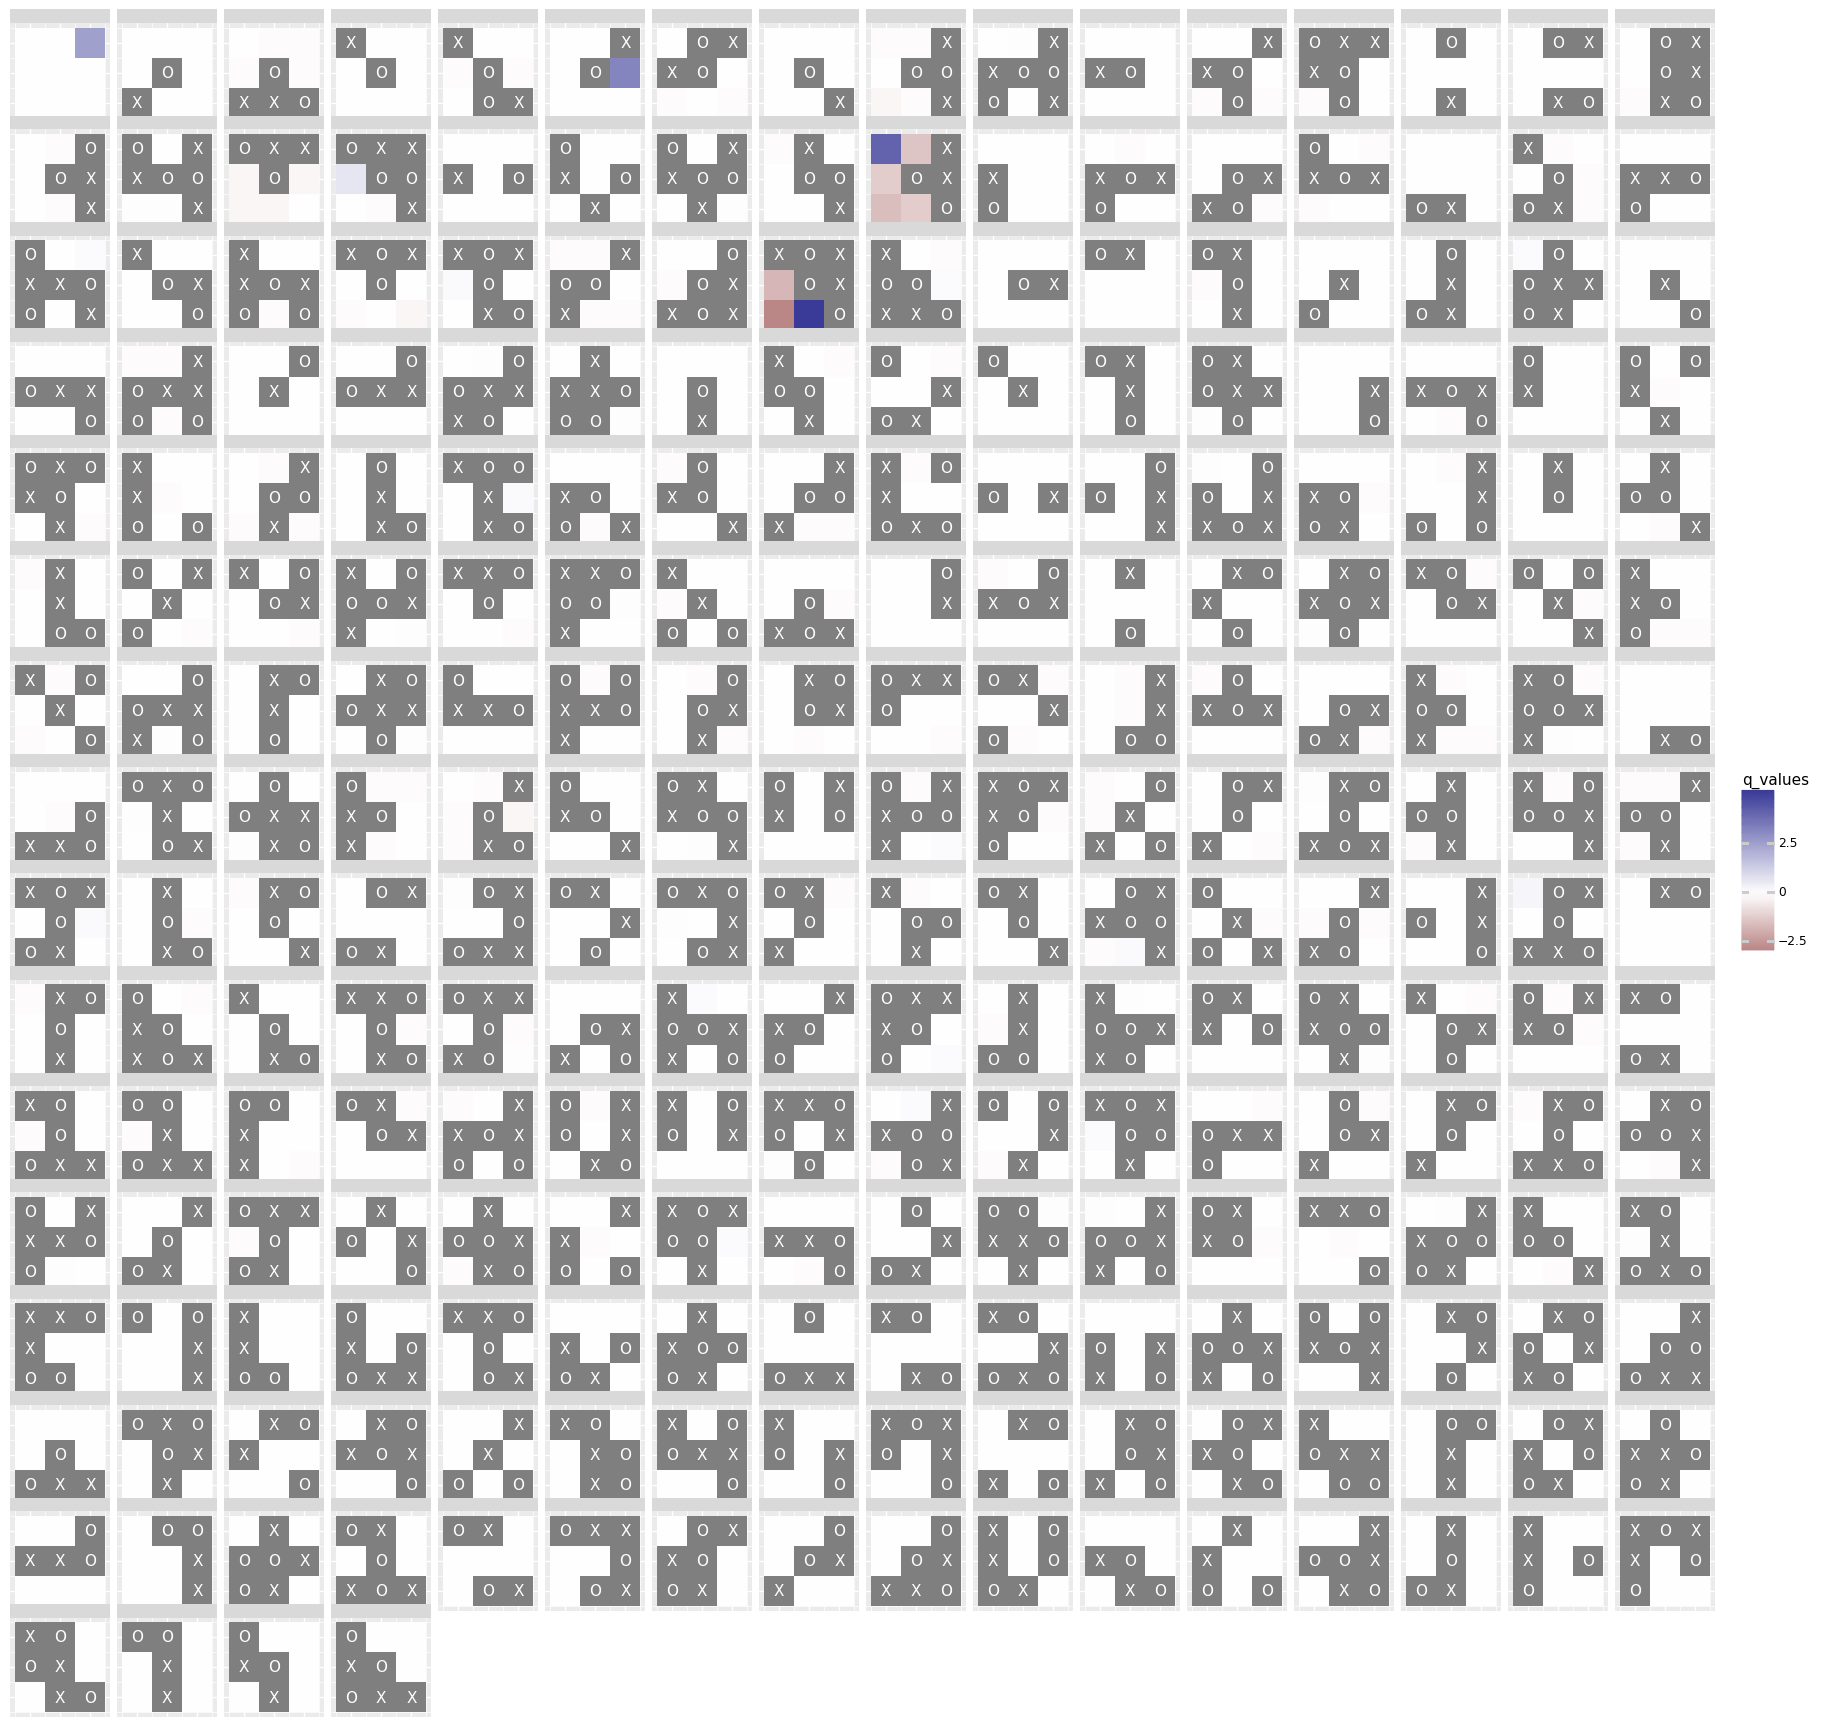

<ggplot: (702997003)>

In [22]:
trained_player.plot_qtable()

## Saving the Q-Table visual

In [ ]:
from plotnine import ggsave

ggsave(trained_player.plot_qtable(), filename='final_qtable.png')